# 基础数据的预处理

此种数据可在聚宽研究环境中打开

In [8]:
# 获取财务数据
q = query(
         valuation.code, #代码
         valuation.market_cap, #总市值
         valuation.pe_ratio,  #市盈率
         valuation.pb_ratio,  
         valuation.ps_ratio,
         valuation.turnover_ratio, # 换手率

         indicator.roe,
         indicator.roa,
         indicator.eps  # 每股收益
                 
     ).filter(
        valuation.pe_ratio < 10
#         valuation.code.in_(['600585.XSHG','601288.XSHG'])
     ).order_by(
                 # 按市值降序排列
                 valuation.market_cap.desc()
     ).limit(
                 # 最多返回100个
                 10
     )

fund = get_fundamentals(q, date = '2020-05-01')
fund  

,code,market_cap,pe_ratio,pb_ratio,ps_ratio,turnover_ratio,roe,roa,eps
0,601398.XSHG,18426.2031,5.8549,0.7204,2.1764,NaN,3.11,0.27,0.2371
1,601939.XSHG,16075.7061,5.9392,0.7319,2.2083,NaN,3.57,0.31,0.3234
2,601288.XSHG,12109.4131,5.6314,0.6649,1.8893,NaN,3.23,0.25,0.1834
3,601988.XSHG,10244.6953,5.4198,0.5990,1.8417,NaN,2.78,0.24,0.1786
4,600036.XSHG,8849.6436,9.2742,1.4556,3.1883,NaN,4.44,0.37,1.1021
5,601658.XSHG,4540.2808,7.2636,0.8695,1.6183,NaN,3.37,0.19,0.2310
6,601328.XSHG,3846.8091,4.9533,0.5415,1.6343,NaN,2.68,0.21,0.2889
7,601166.XSHG,3452.6704,5.1383,0.6806,1.8770,NaN,3.80,0.29,1.0102
8,600585.XSHG,3177.4619,9.7995,2.2331,2.1220,NaN,3.51,2.76,0.9272
9,601088.XSHG,3168.4165,7.8291,0.8753,1.3429,NaN,2.75,2.06,0.4931


## 1.Panel结构

Panel 面板数据结构是为了存储三位数据结构，由截面数据和序列数据组成。

#### 截面数据

> 在同一时间，不同统计单位相同统计指标组成的数据列

#### 序列数据

> 在不同时间点上收集到的数据，反应某一事物随时间变化的状态或程度

## 2.因子去极值处理

去极值并不是删除异常数据，而是将这些数据拉回到正常的值

> 极值可以理解为离群值或异常数据

### 三种方法：

* 分位数去极值  
    * 中位数  
    * 四分位数  
    * 百分位数 
* 中位数绝对偏差去极值    
* 正态分布去极值  

### 2.1 中位数：

将数据按大小顺序排列，取居于中间位置的那个数据

#### 四分位数

把所有数值由小到大排列并分成四份，处于3个分割点处的数值就是四分位数

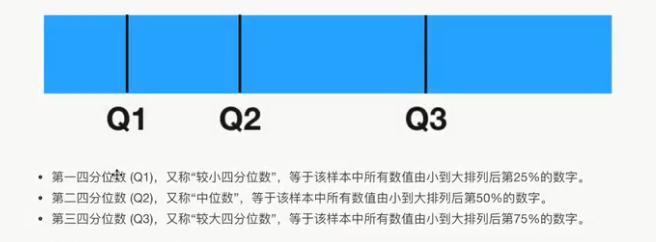

#### 百分位数

百分位数即数据所处位置为整体的某个%位数

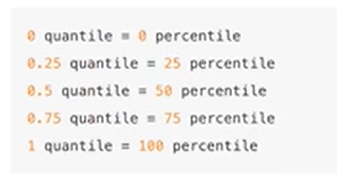

#### 原理

将指定分位数区间的极值用分位点的值替换掉

#### API

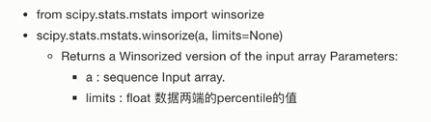

#### 代码示例

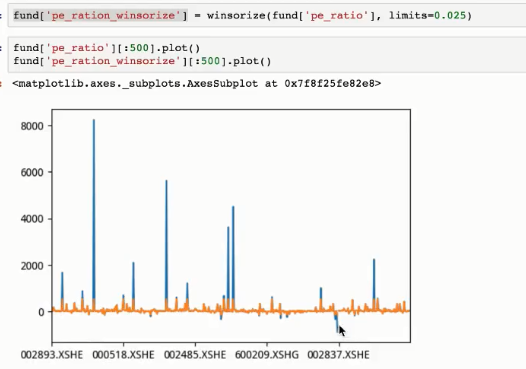

#### 自实现分位数去极值

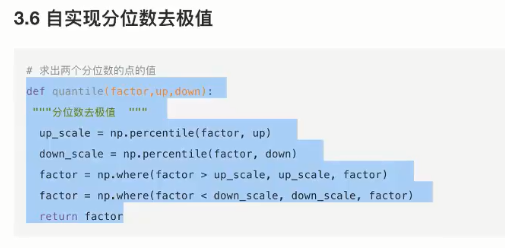

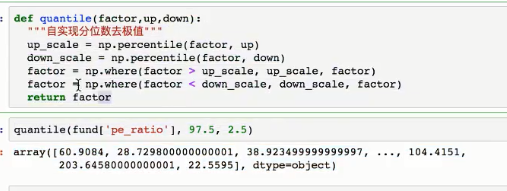

### 2.2 中位数绝对偏差去极值

经常使用3倍中位数法

MAD 又称为中位数绝对偏差法，MAD 是一种先需计算所有因子与中位数之间的距离总和来检测离群值的方法

#### 计算方法

1.找出因子中位数 median  
2.得到每个因子值与中位数的绝对值偏差|x-median|   
3.得到绝对值偏差的中位数 MAD  median(|x-median|)   
4.计算 MAD_e = 1.4826*MAD,然后确定参数n,做出调整

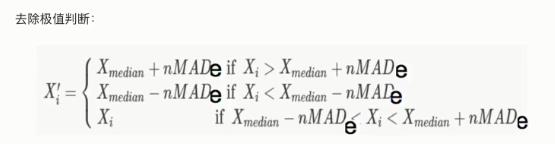

注：通常把偏离中位数三倍 MAD_e，如果样本满足正态分布，且数据量较大，可以证明以上数据作为异常值，和均值标准差方法比，中位数和MAD的计算不受极端异常值得影响，结果更加稳健

#### 实现中位数绝对偏差法

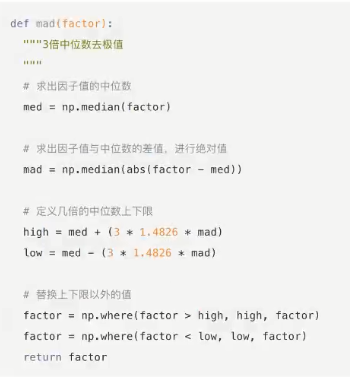

### 2.3 正态分布去极值

效果没有前两种好，一般采取前2种

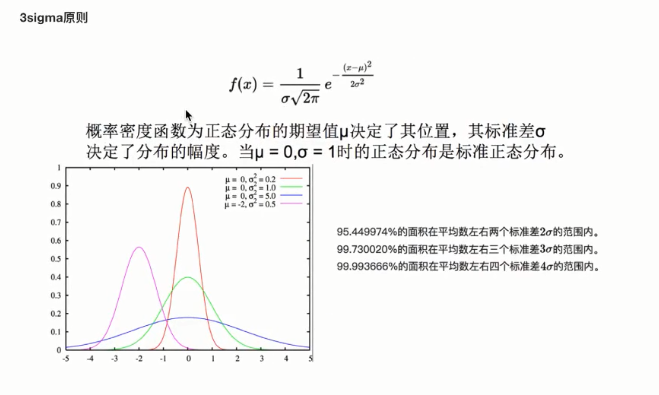

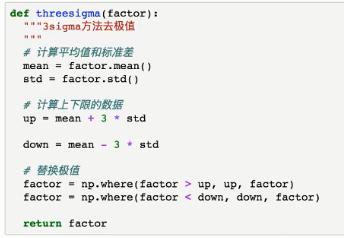

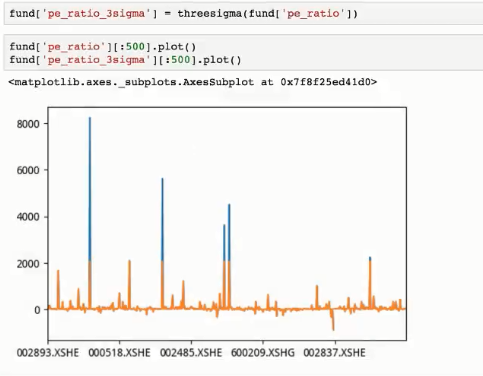

### 2.4 总结

在做去极值处理的时候最好不要使用正态分布去极值法，推荐使用分位数和中位数绝对偏差去极值

## 3.标准化处理

多指标评价体系中，由于各评价指标的性质不同，通常具有不同的量纲和数量级。当各指标间的水平相差很大时，如果直接用原始指标值进行分析，就会突出数值较高的指标在综合分析中的作用，相对削弱数值水平较低指标的作用。因此，为了保证结果的可靠性，需要对原始指标数据进行标准化处理。


### 3.1 API

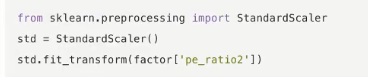

### 3.2 实现标准化

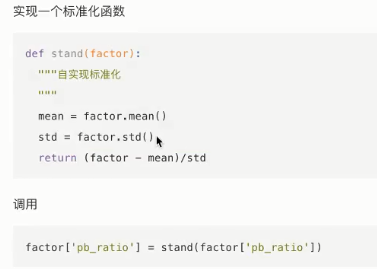

3.3 结果

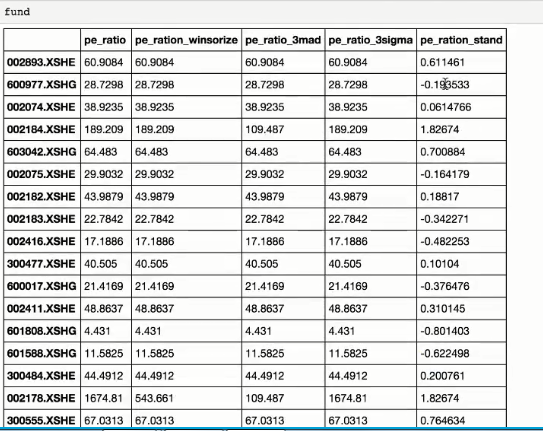

### 3.4 z-score标准化

z-score标准化指的是将数据转化成均值为0方差为1的高斯分布，也就是通常说的z-score标准化，但是对于不服从标准正态分布的特征，这样做效果会很差。

在实际应用中，我们经常忽视分布的形状，将数据进行z-score标准化。如果不将数据进行标准化处理，在利用机器学习算法（例如SVM）的过程中，如果目标函数中的一个特征的方差的阶数的量级高于其他特征的方差，那么这一特征就会在目标函数中占主导地位，从而“淹没”其他特征的作用。

Python中的scale函数是一种快速进行z-score标准化的方法，能够处理类似于数组结构的数据。Z-score标准化后的数据的均值为0，方差为1。

### 3.5 0-1标准化(0-1 normalization)
也叫离差标准化，是对原始数据的线性变换，使结果落到[0,1]区间，转换函数如下：  
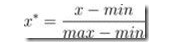  
其中max为样本数据的最大值，min为样本数据的最小值。这种方法有一个缺陷就是当有新数据加入时，可能导致max和min的变化，需要重新定义。  
* 使用sklearn.preprocessing.scale()函数，可以直接将给定数据进行标准化（Z-score 标准化）  
* 使用sklearn.preprocessing.StandardScaler类，使用该类的好处在于可以保存训练集中的参数（均值、方差）直接使用其对象转换测试集数据。

## 4.中性化处理

因子研究中的中性化其实就是起到一个提纯的作用。处理的问题有点类似于计量中对多重共线性。

### 4.1 为什么进行中性化处理

市值中性化是为了在因子选股回测的时候，防止选到的股票集中在固定的某些股票中
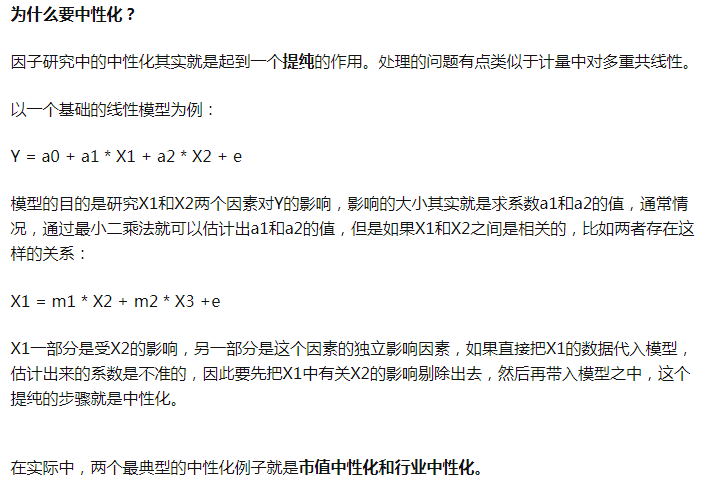

在实际中，两个最典型的中性化例子就是市值中性化和行业中性化。

比如日成交额这个数据，其实是受市值的影响很大，市值大的股票通常每日的成交额较大，如果同时将成交额和市值两个因子放入模型，就会出现多重共线性问题，无法准确估计出影响力的大小。

因此，代入模型之前先要对成交额因子提纯，排除市值的影响。具体方法是将成交额和市值进行线性回归，减去市值的影响，剩下的残差就是独立的影响因子。

同样，行业对因子的影响也很普遍，比如前期提到的股息率因子就受不同行业特征的影响，需要通过行业中性化先排除行业的影响，具体方法是将行业设为虚拟变量

### 4.2 市值影响  

默认大部分因子当中都包含了市值影响，当通过一些指标选择股票的时候，每个因子都会提供市值的因素，导致选择的股票比较集中，以及选股的标准不太好

比如：市净率会和市值有很高的的相关性，这时如果市净率未进行市值中性化处理，选股的结果比较集中

### 4.3 如何去除市值影响

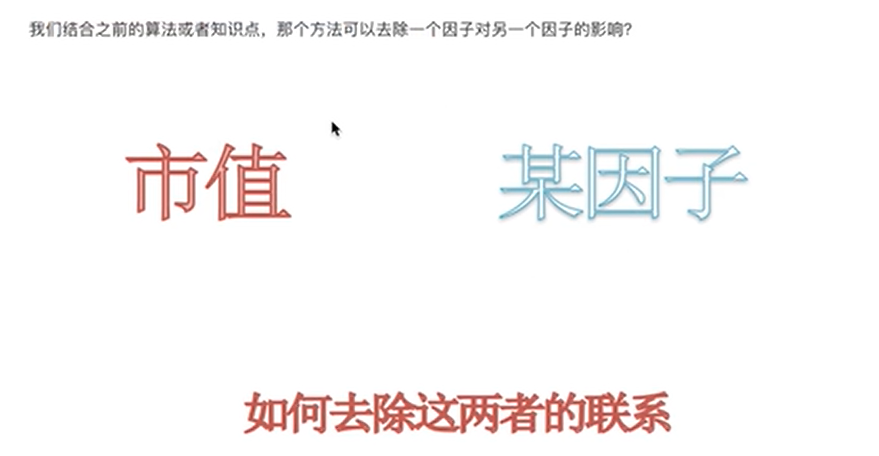

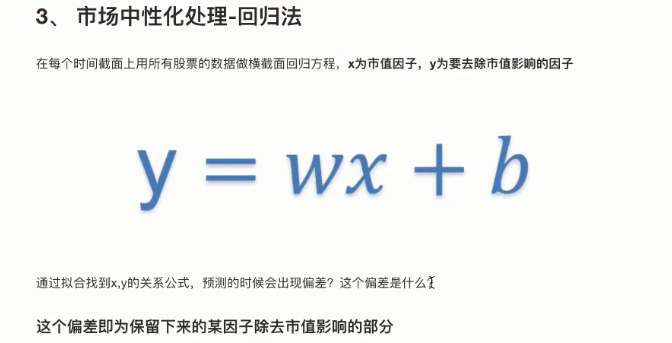

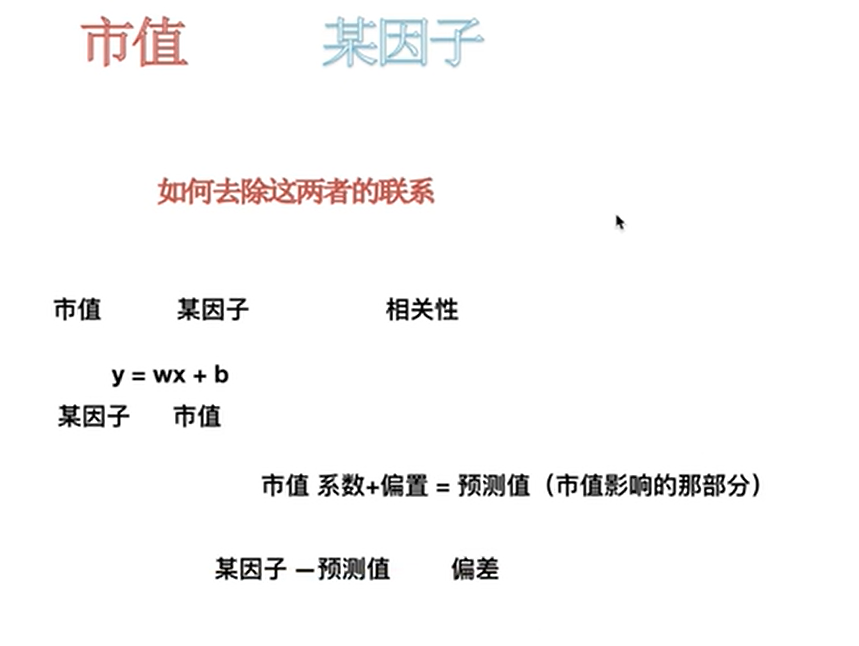

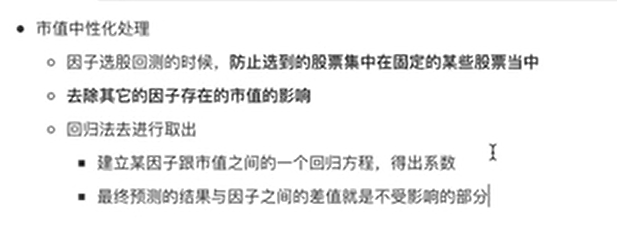

### 4.4 API

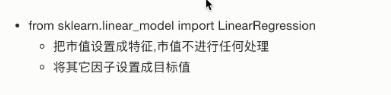

### 4.5 案例

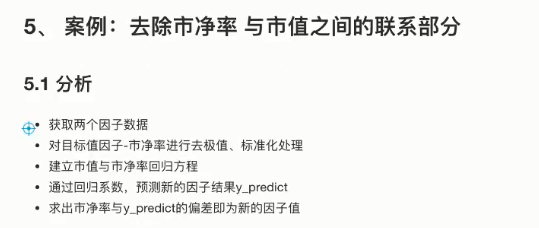

代码：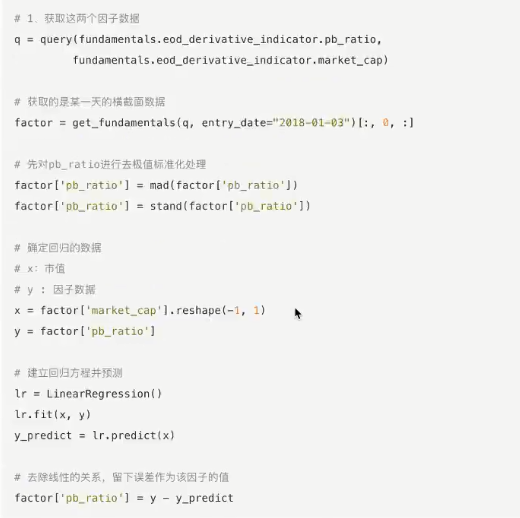

完整过程：
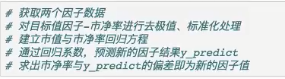

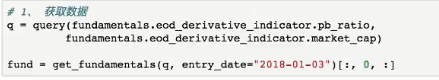

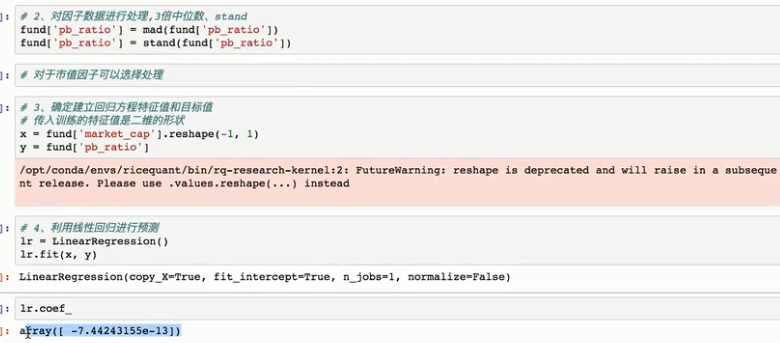

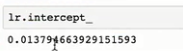

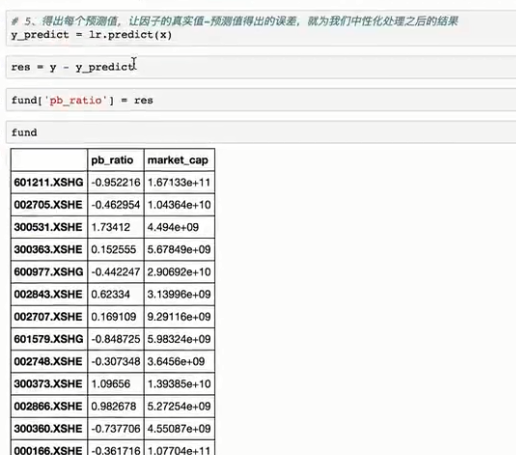